In [1]:
import pandas as pd

df = pd.read_excel("LDA db.xlsx", sheet_name="winter")


In [3]:
df.head()       # Shows the first five rows
df.info()       # Gives an overview of columns, data types, and non-null counts
df.describe()   # Provides summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  428 non-null    object 
 1   NDVI705  428 non-null    float64
 2   PSNDa    428 non-null    float64
 3   YI       428 non-null    float64
 4   RES      428 non-null    float64
 5   PRI      428 non-null    float64
 6   NDVIa    428 non-null    float64
 7   NDVIb    428 non-null    float64
dtypes: float64(7), object(1)
memory usage: 26.9+ KB


,NDVI705,PSNDa,YI,RES,PRI,NDVIa,NDVIb
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,0.375749,0.723548,-0.006906,0.458833,0.019559,0.719142,0.717931
std,0.061755,0.054434,0.003506,0.062412,0.018534,0.054564,0.055066
min,0.217123,0.567181,-0.016645,0.342576,-0.057982,0.562577,0.560911
25%,0.332685,0.687133,-0.009161,0.414249,0.009887,0.682558,0.680949
50%,0.370879,0.720556,-0.007350,0.447663,0.024525,0.715053,0.716009
75%,0.420837,0.761769,-0.005534,0.494723,0.033363,0.757949,0.757302
max,0.525403,0.848931,0.009570,0.622536,0.054443,0.846015,0.845393


Free attempt - all indices - straightforward

Accuracy: 0.3488372093023256


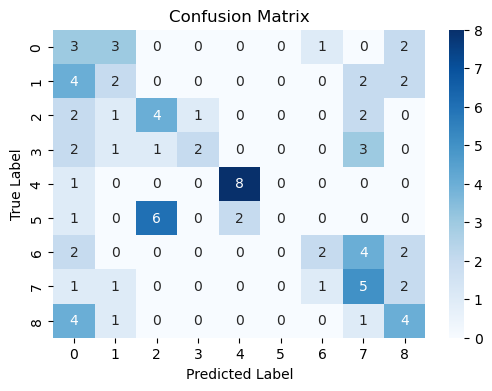

             AVEFA     Barley      ECHCG        Oat      PAPRO  POLAV  \
AVEFA    33.333333  33.333333   0.000000   0.000000   0.000000    0.0   
Barley   40.000000  20.000000   0.000000   0.000000   0.000000    0.0   
ECHCG    20.000000  10.000000  40.000000  10.000000   0.000000    0.0   
Oat      22.222222  11.111111  11.111111  22.222222   0.000000    0.0   
PAPRO    11.111111   0.000000   0.000000   0.000000  88.888889    0.0   
POLAV    11.111111   0.000000  66.666667   0.000000  22.222222    0.0   
Wheat D  20.000000   0.000000   0.000000   0.000000   0.000000    0.0   
Wheat I  10.000000  10.000000   0.000000   0.000000   0.000000    0.0   
Wheat S  40.000000  10.000000   0.000000   0.000000   0.000000    0.0   

           Wheat D    Wheat I    Wheat S  
AVEFA    11.111111   0.000000  22.222222  
Barley    0.000000  20.000000  20.000000  
ECHCG     0.000000  20.000000   0.000000  
Oat       0.000000  33.333333   0.000000  
PAPRO     0.000000   0.000000   0.000000  
POLAV     0

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and 'species' is the target column:
X = df.drop("species", axis=1)  # Features
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

# Initialize and train the SVM classifier
# Here we use the RBF kernel; adjust 'C' and 'kernel' as needed
svm = SVC(kernel='rbf', C=1.0)
svm.fit(X_train, y_train)

# Evaluate the model
accuracy = svm.score(X_test, y_test)
print("Accuracy:", accuracy)

# Compute and plot the confusion matrix
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute confusion matrix percentages for a detailed view
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
class_labels = np.unique(y_test)
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
print(cm_df)


In [8]:
from sklearn.metrics import confusion_matrix, classification_report
# Generate classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

KNN Classification Report:
              precision    recall  f1-score   support

       AVEFA       0.15      0.33      0.21         9
      Barley       0.22      0.20      0.21        10
       ECHCG       0.36      0.40      0.38        10
         Oat       0.67      0.22      0.33         9
       PAPRO       0.80      0.89      0.84         9
       POLAV       0.00      0.00      0.00         9
     Wheat D       0.50      0.20      0.29        10
     Wheat I       0.29      0.50      0.37        10
     Wheat S       0.33      0.40      0.36        10

    accuracy                           0.35        86
   macro avg       0.37      0.35      0.33        86
weighted avg       0.37      0.35      0.33        86



In [14]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Example species lists for each category
monocot_species = ["Barley", "Wheat D", "Wheat I", "Wheat S", "Oat", "AVEFA", "ECHCG"]
dicot_species   = ["PAPRO", "POLAV"]
weed_species    = ["AVEFA", "PAPRO", "POLAV", "ECHCG"]
crop_species    = ["Barley", "Wheat D", "Wheat I", "Wheat S", "Oat"]

# Third-level species groups (adjust as needed)
monocot_weed_species = ["AVEFA", "ECHCG"]
monocot_crop_species = ["Barley", "Wheat D", "Wheat I", "Wheat S", "Oat"]
dicot_weed_species   = ["PAPRO", "POLAV"]

# Assume df is your main DataFrame with features and a 'species' column.
# Create first-level and second-level categories.
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# Select features and target for level 1.
X = df[["PSNDa", "YI", "NDVI705", "RES", "PRI","NDVIa","NDVIb"]]
y_cat1 = df["category1"]

# Level 1: Monocot vs. Dicot classification using SVM.
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(
    X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = SVC(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)
y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1.
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

# Level 2 for Monocots: Train weed vs. crop classifier.
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]
X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(
    X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = SVC(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

# Level 2 for Dicots:
# Check if there is any crop data among dicots.
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]
if (y_dicot == 'crop').sum() > 0:
    X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(
        X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
    clf_cat2_dicot = SVC(random_state=42)
    clf_cat2_dicot.fit(X_train_di, y_train_di)
else:
    # If no dicot crop data, set level 2 for dicots to always predict 'weed'
    clf_cat2_dicot = None

# Level 3: Species-level classification models.
# Monocot-Weed model.
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]
clf_mono_weed = SVC(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model.
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]
clf_mono_crop = SVC(random_state=42)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model.
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]
clf_dicot_weed = SVC(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

# Dicot-Crop model: Train only if any dicot crop data exists.
dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
if dicot_crop_mask.sum() > 0:
    X_dicot_crop = X[dicot_crop_mask]
    y_dicot_crop = df['species'][dicot_crop_mask]
    clf_dicot_crop = SVC(random_state=42)
    clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)
else:
    clf_dicot_crop = None

# Final species prediction using the hierarchical approach.
final_species_preds = []

for idx in X_test_cat1.index:
    # Level 1: Predict monocot/dicot.
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    
    if cat1_pred == 'monocot':
        # Level 2 (monocot): Use classifier to decide weed vs. crop.
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        # Level 2 (dicot): If classifier exists, use it; otherwise, default to 'weed'.
        if clf_cat2_dicot is not None:
            cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]
        else:
            cat2_pred = 'weed'
        # Level 3: Use dicot model based on level 2 decision.
        if cat2_pred == 'weed' or clf_dicot_crop is None:
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]
    
    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate final species-level accuracy.
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

# Optionally, display the confusion matrix (in percentages).
cm = confusion_matrix(y_test_species, final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
class_labels = np.unique(y_test_species)
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
print(cm_df)


Final Species-Level Accuracy: 0.3023255813953488
         AVEFA     Barley  ECHCG  Oat       PAPRO  POLAV    Wheat D  \
AVEFA      0.0  55.555556    0.0  0.0    0.000000    0.0  22.222222   
Barley     0.0  28.571429    0.0  0.0    0.000000    0.0  28.571429   
ECHCG      0.0  37.500000    0.0  0.0   25.000000    0.0   0.000000   
Oat        0.0  63.636364    0.0  0.0    0.000000    0.0   0.000000   
PAPRO      0.0   0.000000    0.0  0.0  100.000000    0.0   0.000000   
POLAV      0.0  12.500000    0.0  0.0   25.000000   25.0  12.500000   
Wheat D    0.0   0.000000    0.0  0.0    0.000000    0.0  33.333333   
Wheat I    0.0  22.222222    0.0  0.0   11.111111    0.0   0.000000   
Wheat S    0.0  20.000000    0.0  0.0    0.000000    0.0  40.000000   

           Wheat I    Wheat S  
AVEFA     0.000000  22.222222  
Barley   42.857143   0.000000  
ECHCG    37.500000   0.000000  
Oat      36.363636   0.000000  
PAPRO     0.000000   0.000000  
POLAV    25.000000   0.000000  
Wheat D  44.4444

In [16]:
# Generate classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test_species, final_species_preds, zero_division=0))

KNN Classification Report:
              precision    recall  f1-score   support

       AVEFA       0.00      0.00      0.00         9
      Barley       0.10      0.29      0.14         7
       ECHCG       0.00      0.00      0.00         8
         Oat       0.00      0.00      0.00        11
       PAPRO       0.69      1.00      0.81        11
       POLAV       1.00      0.25      0.40         8
     Wheat D       0.46      0.33      0.39        18
     Wheat I       0.16      0.44      0.24         9
     Wheat S       0.11      0.20      0.14         5

    accuracy                           0.30        86
   macro avg       0.28      0.28      0.24        86
weighted avg       0.31      0.30      0.27        86



In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Only used by non-linear kernels
    'degree': [2, 3, 4]  # Only used by the polynomial kernel
}

# Create the SVC instance
svc = SVC(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search on your training data (e.g., for one level of the hierarchy)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


KeyboardInterrupt: 